## The Sparks Foundation-GRIP - Data Science & Business Analytics - Oct-2021

## Task 1:  Prediction using Supervised ML

### Author:  Satish Kumar

### Dataset Link:  http://bit.ly/w-data

### Problem Statements:  Predict the percentage of an student based on the no. of study hours.
### What will be predicted score if a student studies for 9.25 hrs/ day?




### Import The libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
#Display to 10 rows data from data set

df.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Ckecking no of rows and columns in dataset

df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Displying statical info

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Displaying null values in dataset

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

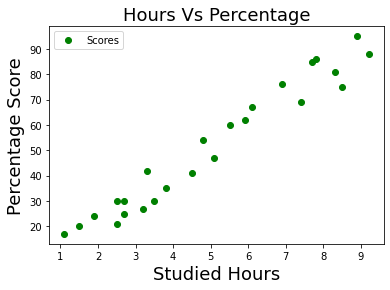

In [8]:
# Plotting the distribution of scores

df.plot(x ='Hours', y ='Scores', style= 'o', color = 'green')
plt.title("Hours Vs Percentage", size= 18)
plt.xlabel("Studied Hours", size= 18)
plt.ylabel("Percentage Score", size= 18)
plt.show()


#### From the above graph there is a positive linear relation between the number of hours studied and percentage of score.

### Distribution Of the Continuous Variables


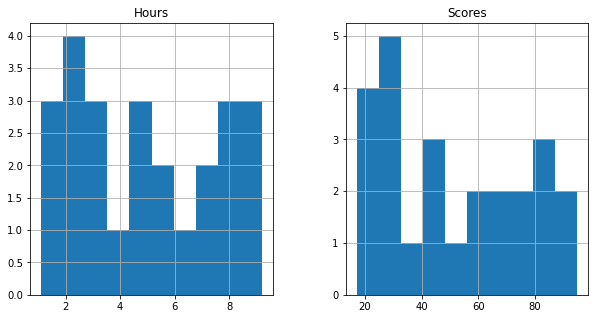

In [9]:
df.hist(['Hours','Scores'],figsize = (10,5))
plt.show()

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Corelation 

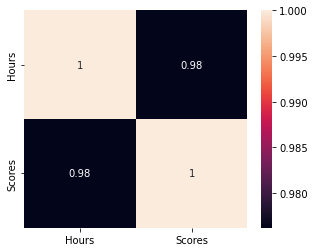

In [11]:
corr = df.corr()
plt.subplots(figsize = (5,4))
sns.heatmap(corr,annot = True)
plt.show()

## Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = df.iloc[:, :-1].values  # all rows and column except last column
y = df.iloc[:, 1].values    # all rows and only 1st column 

## Splitting The Data Into Training and Testing Data

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
                             

## Training the Algorithm 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete")


Training complete


## Plotting The Regression Line

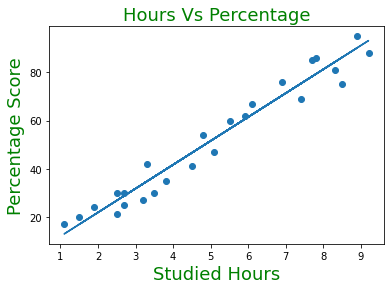

In [15]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title("Hours Vs Percentage", size= 18, color = 'green')
plt.xlabel("Studied Hours", size= 18,color = 'green')
plt.ylabel("Percentage Score", size= 18,color = 'green')
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head() 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# test with your own data

Hours = [[9.25]] #predict takes 2D array 
own_pred = regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# Thank You!!